# Importações

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
!gdown '1gVPbuXfVDidJdbPKCtxy9qwQlJ0XKPRi'

Downloading...
From: https://drive.google.com/uc?id=1gVPbuXfVDidJdbPKCtxy9qwQlJ0XKPRi
To: /content/data_fruit.csv
100% 1.20k/1.20k [00:00<00:00, 5.35MB/s]


In [ ]:
db = pd.read_csv('/content/data_fruit.csv', encoding='utf-8')
dbToGraph = pd.read_csv('/content/data_fruit.csv', encoding='utf-8')

# Avaliação Prévia

In [ ]:
db.head()

,mass,width,height,color_score,fruit_name
0,192,8.4,7.3,0.55,apple
1,180,8.0,6.8,0.59,apple
2,86,6.2,4.7,0.80,mandarin
3,84,6.0,4.6,0.79,mandarin
4,80,5.8,4.3,0.77,mandarin


In [ ]:
db.describe()

,mass,width,height,color_score
count,48.000000,48.000000,48.000000,48.000000
mean,161.166667,7.106250,7.679167,0.763125
std,51.531165,0.762249,1.324717,0.074553
min,80.000000,5.800000,4.300000,0.550000
25%,140.000000,6.650000,7.200000,0.720000
50%,157.000000,7.250000,7.550000,0.750000
75%,178.500000,7.500000,8.125000,0.810000
max,356.000000,9.200000,10.500000,0.920000


In [ ]:
db['fruit_name'].value_counts()

orange      16
apple       15
lemon       13
mandarin     4
Name: fruit_name, dtype: int64

Text(0, 0.5, 'Massa')

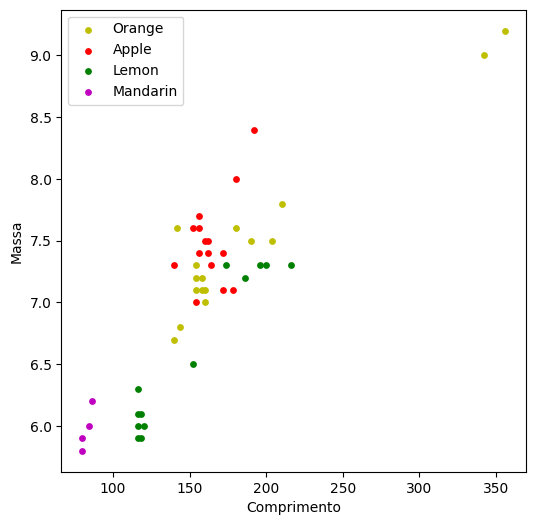

In [ ]:
orange = dbToGraph[dbToGraph['fruit_name'].isin(["orange"])]
apple = dbToGraph[dbToGraph['fruit_name'].isin(["apple"])]
lemon = dbToGraph[dbToGraph['fruit_name'].isin(["lemon"])]
mandarin = dbToGraph[dbToGraph['fruit_name'].isin(["mandarin"])]


fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(orange['mass'], orange['width'], s=15, c='y', marker='o', label='Orange')
ax.scatter(apple['mass'], apple['width'], s=15, c='r', marker='o', label='Apple')
ax.scatter(lemon['mass'], lemon['width'], s=15, c='g', marker='o', label='Lemon')
ax.scatter(mandarin['mass'], mandarin['width'], s=15, c='m', marker='o', label='Mandarin')
ax.legend()
ax.set_xlabel('Comprimento')
ax.set_ylabel('Massa')

Text(0, 0.5, 'Massa')

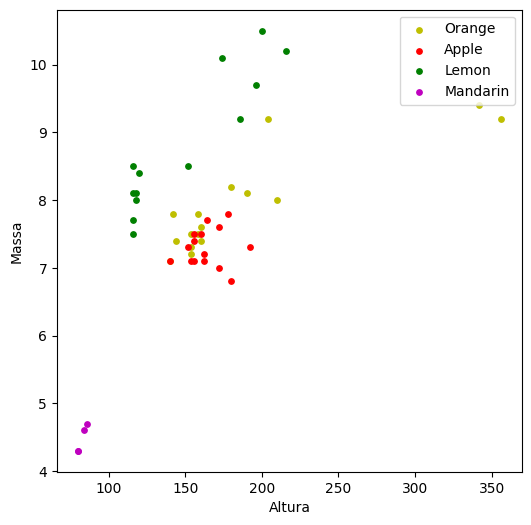

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(orange['mass'], orange['height'], s=15, c='y', marker='o', label='Orange')
ax.scatter(apple['mass'], apple['height'], s=15, c='r', marker='o', label='Apple')
ax.scatter(lemon['mass'], lemon['height'], s=15, c='g', marker='o', label='Lemon')
ax.scatter(mandarin['mass'], mandarin['height'], s=15, c='m', marker='o', label='Mandarin')
ax.legend()
ax.set_xlabel('Altura')
ax.set_ylabel('Massa')

# Método

In [ ]:
target = db.iloc[: , -1]
X = db.drop('fruit_name',axis=1)
y = target

Utilizando a proporção de 30% dos dados para testes e 70% para treino.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

1.0

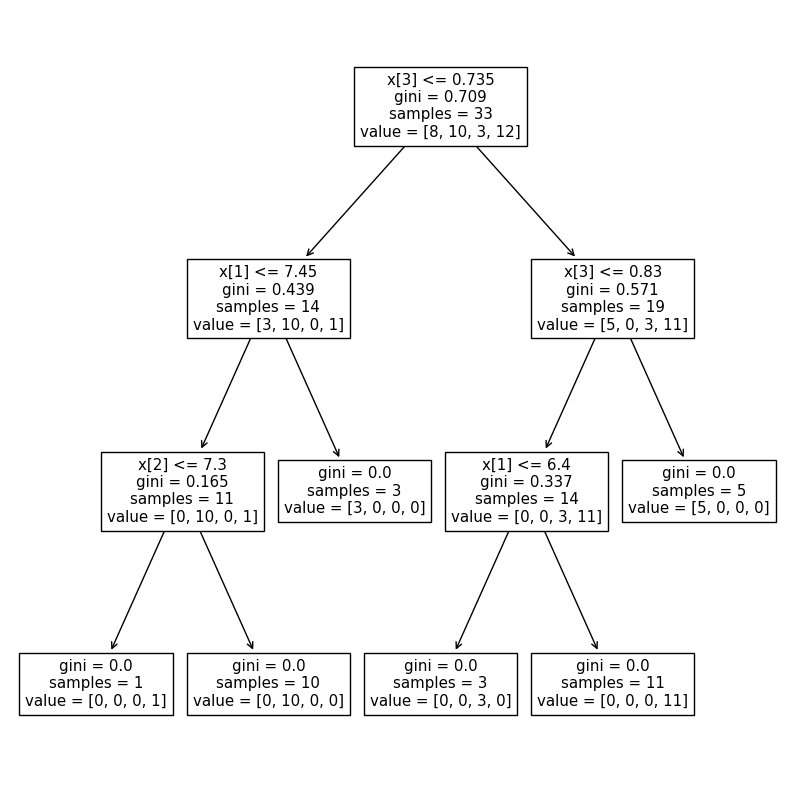

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

tree.plot_tree(clf)

plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5, 1, 0, 1],
       [0, 2, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 4]])

# Métrica

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, np.array(db.drop('fruit_name',axis=1)), np.array(target), cv=4, scoring='accuracy')
scores

array([0.83333333, 1.        , 0.83333333, 0.91666667])

In [ ]:
scores.mean()

0.8958333333333334

Acurácia de 89.58%